In [1]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
df.shape

(442, 11)

In [2]:
X = df.drop("target", axis = 1)
Y = df['target']

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y)

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# max_depth, min_samples_leaf, min_samples_split,
model = DecisionTreeRegressor(max_depth=5)
model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=5)

In [10]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.6826478139331519
0.10851670877410347


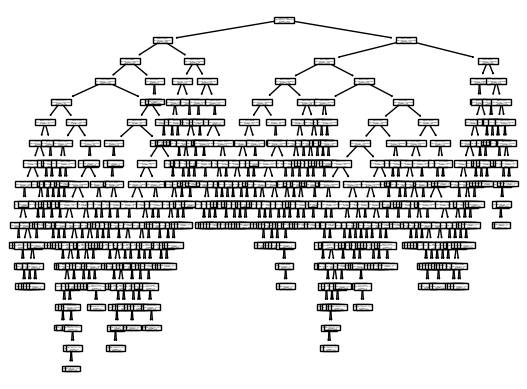

In [8]:
import matplotlib.pyplot as plt
plot_tree(model, feature_names=X.columns)
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치.
param = {"max_depth" : [None, 1, 5, 10, 20],
         "min_samples_leaf" : range(1, 21),
         "min_samples_split" : [2, 5, 10, 20, 30, 40],
         "max_features" : [None, "sqrt", "log2", 0.7]}

model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param,
                           cv = 5, scoring = "r2",
                           verbose = 1) # r2

grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2', 0.7],
                         'min_samples_leaf': range(1, 21),
                         'min_samples_split': [2, 5, 10, 20, 30, 40]},
             scoring='r2', verbose=1)

In [23]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 13,
 'min_samples_split': 30}

In [26]:
# (-grid_search.best_score_) ** (1/2)

In [25]:
model = grid_search.best_estimator_
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.5496436187670724
0.21922320660731198


In [28]:
pd.DataFrame(grid_search.cv_results_).to_excel("grid_search_result.xlsx")

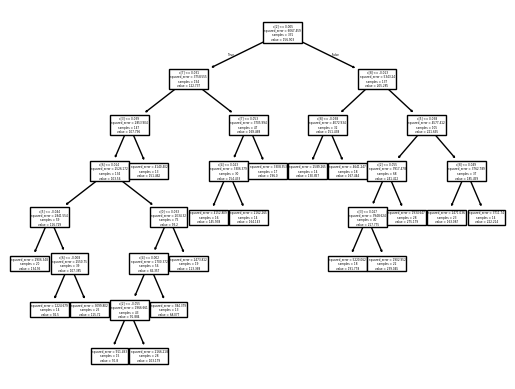

In [29]:
plot_tree(model)
plt.show()

In [30]:
# 그리드 서치 vs 랜덤 서치
from sklearn.model_selection import RandomizedSearchCV
model = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param,
                                   n_iter = 1000, cv = 5, scoring = "r2")

random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=1000,
                   param_distributions={'max_depth': [None, 1, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         0.7],
                                        'min_samples_leaf': range(1, 21),
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40]},
                   scoring='r2')

In [31]:
random_search.best_params_

{'min_samples_split': 30,
 'min_samples_leaf': 7,
 'max_features': 0.7,
 'max_depth': 5}

In [32]:
model = random_search.best_estimator_
model.score(test_x, test_y)

0.24125831783091223

In [34]:
# 랜덤포레스트(안정적), XGboost
# 결정트리 <= 랜덤포레스트.
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
X = iris.drop("species", axis = 1)
Y = iris['species']

In [37]:
# 앙상블: 여러개의 머신러닝 모델들을 결합.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(oob_score=True) # 선택받지못한 데이터로 평가.
model.fit(X, Y)

RandomForestClassifier(oob_score=True)

In [38]:
model.oob_score_

0.9533333333333334

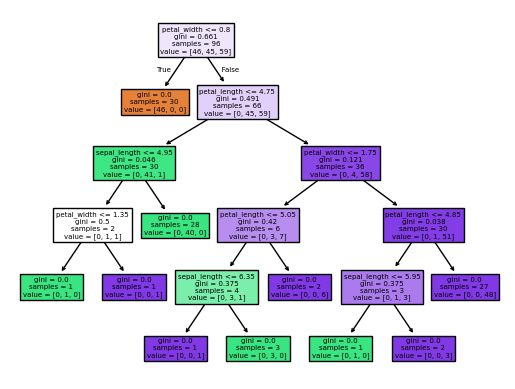

In [43]:
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

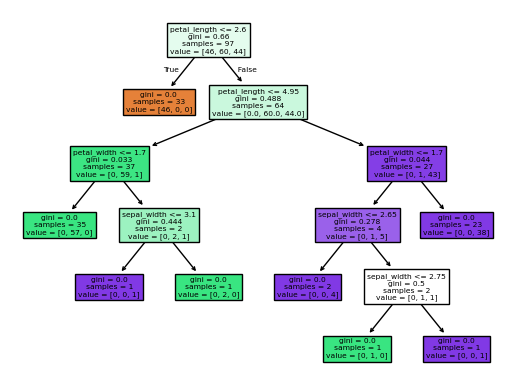

In [44]:
# 데이터가 균일.
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns)
plt.show()

In [ ]:
# 랜덤포레스트 모델로 암 예측 모델 만들기!

In [ ]:
# 목: 머신러닝 시험.
# 5문제 (3시간) - 노트, Jupyter Notebook (GPT, 검색 X)

In [ ]:
# XGboost 원리 : 약한 나무로 나온 오차로 다음 나무가 학습.
# 랜덤포레스트 : 랜덤한 나무 100개

# 약한 학습기 : 성능이 안좋은 모델(찍은것보단 나은 수준의 모델.)

In [46]:
bike = pd.read_csv("bike data.csv")
del bike['datetime']
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0,16
1,1,0,0,1,9.02,13.635,80,0.0,40
2,1,0,0,1,9.02,13.635,80,0.0,32
3,1,0,0,1,9.84,14.395,75,0.0,13
4,1,0,0,1,9.84,14.395,75,0.0,1


In [48]:
X = bike.drop("count", axis = 1).values
Y = bike['count'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [50]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(max_depth=2)
model1.fit(train_x, train_y)

train_y2 = train_y - model1.predict(train_x)
train_y2

array([ 287.68962723, -355.31037277, -222.84133442, ...,  -68.84133442,
        -93.97661958,  333.02338042])

In [51]:
model2 = DecisionTreeRegressor(max_depth=2)
model2.fit(train_x, train_y2)

train_y3 = train_y2 - model2.predict(train_x)
train_y3

array([ 282.39602902, -360.60397098, -182.5454672 , ...,  -74.13493262,
        -99.27021779,  373.31924764])

In [52]:
model3 = DecisionTreeRegressor(max_depth=2)
model3.fit(train_x, train_y3)

DecisionTreeRegressor(max_depth=2)

In [57]:
from sklearn.metrics import mean_squared_error

pred1 = model1.predict(test_x)
pred2 = model2.predict(test_x)
pred3 = model3.predict(test_x)

pred = pred1 + pred2 + pred3

mean_squared_error(test_y, pred) ** (1/2)

154.9055464397912

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=3, max_depth=2, learning_rate=1)
model.fit(train_x, train_y)

pred = model.predict(test_x)
mean_squared_error(test_y, pred) ** (1/2)

154.9055464397912